In [1]:
# importing libraries, etc...

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

path = "https://raw.githubusercontent.com/LennardVaarten/ML-Workshops/main/data/"

# **Loading and Viewing the Data**

In [2]:
# loading

titanic = pd.read_csv(path+"titanic.csv")

In [3]:
# viewing

titanic

,survived,age,passengerClass,sexMale
0,1,29.0000,1,0
1,1,0.9167,1,1
2,0,2.0000,1,0
3,0,30.0000,1,1
4,0,25.0000,1,0
...,...,...,...,...
1041,0,45.5000,3,1
1042,0,14.5000,3,0
1043,0,26.5000,3,1
1044,0,27.0000,3,1


In [4]:
# summarizing the features and target

titanic.describe()

,survived,age,passengerClass,sexMale
count,1046.000000,1046.000000,1046.000000,1046.000000
mean,0.408222,29.881135,2.207457,0.629063
std,0.491740,14.413500,0.841497,0.483287
min,0.000000,0.166700,1.000000,0.000000
25%,0.000000,21.000000,1.000000,0.000000
50%,0.000000,28.000000,2.000000,1.000000
75%,1.000000,39.000000,3.000000,1.000000
max,1.000000,80.000000,3.000000,1.000000


# **Scaling the Features**

In [5]:
# scaling all the features, so that the values for each feature range from 0 to 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(titanic)

titanic[:] = scaler.transform(titanic)

In [6]:
titanic

,survived,age,passengerClass,sexMale
0,1.0,0.361169,0.0,0.0
1,1.0,0.009395,0.0,1.0
2,0.0,0.022964,0.0,0.0
3,0.0,0.373695,0.0,1.0
4,0.0,0.311064,0.0,0.0
...,...,...,...,...
1041,0.0,0.567850,1.0,1.0
1042,0.0,0.179540,1.0,0.0
1043,0.0,0.329854,1.0,1.0
1044,0.0,0.336117,1.0,1.0


# **Splitting into Training Set and Test Set**

In [7]:
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(titanic.iloc[:,1:], 
                                                                            titanic.iloc[:,0],
                                                                            random_state=99)

In [8]:
features_train

,age,passengerClass,sexMale
576,0.323591,1.0,1.0
119,0.887265,0.0,1.0
80,0.386221,0.0,1.0
277,0.624217,0.0,0.0
769,0.311064,1.0,1.0
...,...,...,...
176,0.574113,0.0,1.0
449,0.398747,0.5,1.0
55,0.448852,0.0,1.0
919,0.511482,1.0,0.0


In [9]:
target_train

576    0.0
119    0.0
80     0.0
277    1.0
769    0.0
      ... 
176    0.0
449    0.0
55     0.0
919    0.0
641    0.0
Name: survived, Length: 784, dtype: float64

In [10]:
features_test

,age,passengerClass,sexMale
560,0.248434,1.0,1.0
691,0.298538,1.0,1.0
22,0.524008,0.0,0.0
222,0.762004,0.0,1.0
390,0.373695,0.5,1.0
...,...,...,...
369,0.436325,0.5,1.0
594,0.286012,1.0,1.0
372,0.423799,0.5,0.0
840,0.486430,1.0,1.0


In [11]:
target_test

560    0.0
691    0.0
22     1.0
222    0.0
390    0.0
      ... 
369    0.0
594    0.0
372    1.0
840    0.0
199    0.0
Name: survived, Length: 262, dtype: float64

# **Plotting Some Graphs**

In [12]:
# concatenating features and target to make plotting easier

train = pd.concat([features_train, target_train], 
                       axis=1)
test = pd.concat([features_test, target_test], 
                      axis=1)

train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

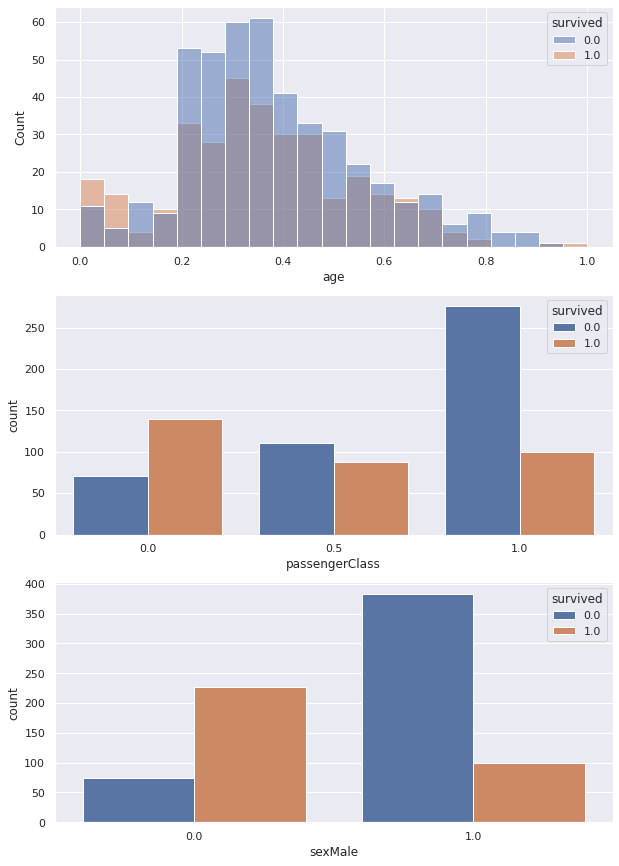

In [13]:
# plotting each feature against the target 

fig, axes = plt.subplots(3, figsize=(10,15))

for i in range(3):
    if len(train.iloc[:,i].value_counts()) > 3:
      sns.histplot(ax=axes[i],x=train.columns[i], data=train, hue="survived")
    else:
      sns.countplot(ax=axes[i], x=train.columns[i], data=train, hue='survived') 

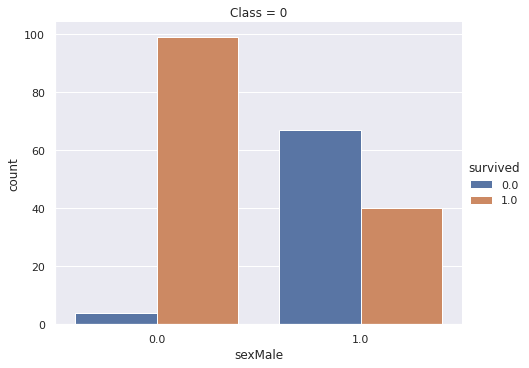

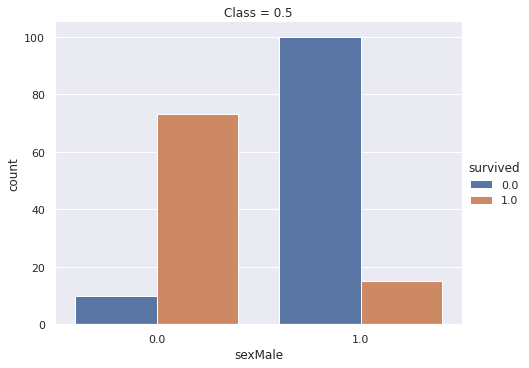

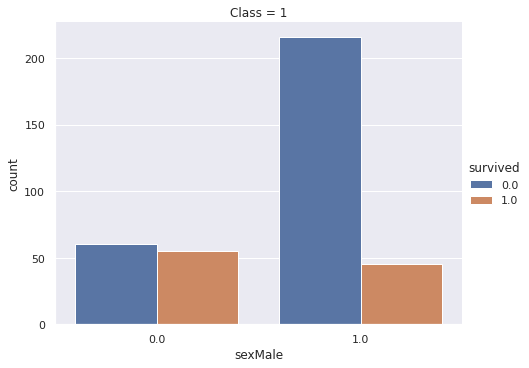

In [14]:
# plotting class and sex against survival rates

for pclass in [0, 0.5, 1]:
  sns.catplot(x="sexMale", hue="survived", kind="count", aspect=1.33, data=train[train["passengerClass"]==pclass]).set(title=f"Class = {pclass}")

# **Fit, Predict, Evaluate**

In [20]:
# fitting k-NN on the training set

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, weights="uniform").fit(features_train, target_train)

In [21]:
# what would our model predict for someone who had an average age, travelled 2nd class and was female?

print("Test prediction: {}".format(knn.predict(np.array([[0.1, 0.5, 1]]))[0]))

Test prediction: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [22]:
# our model's predictions for the entire test set

knn.predict(features_test)

array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0.

In [23]:
print(f"Training set score: {knn.score(features_train, target_train):.2f}")
print(f"Test set score: {knn.score(features_test, target_test):.2f}")

Training set score: 0.84
Test set score: 0.81


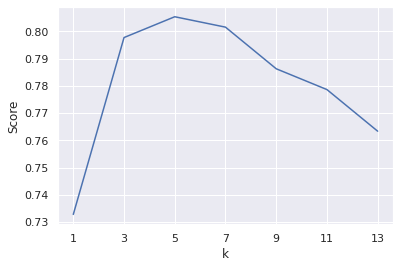

In [24]:
neighbors_settings = [k for k in range(1,14,2)]
scores = []

for k in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(features_train, target_train)
    scores.append(knn.score(features_test, target_test))
    
settingsPlot = sns.lineplot(x=neighbors_settings, y=scores)
settingsPlot.set_xticks(neighbors_settings)
settingsPlot.set_xlabel("k")
settingsPlot.set_ylabel("Score")

settingsPlot

## If We Hadn't Included The 'Age' Feature...

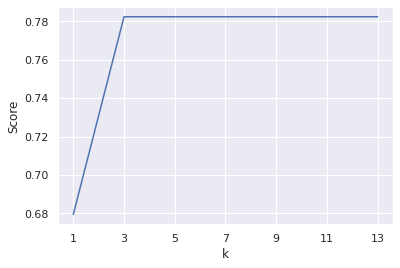

In [25]:
features_train, features_test, target_train, target_test = train_test_split(titanic.iloc[:,2:], 
                                                                            titanic.iloc[:,0],
                                                                            random_state=99)
neighbors_settings = [k for k in range(1,14,2)]
scores = []

for k in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(features_train, target_train)
    scores.append(knn.score(features_test, target_test))
    
settingsPlot = sns.lineplot(x=neighbors_settings, y=scores)
settingsPlot.set_xticks(neighbors_settings)
settingsPlot.set_xlabel("k")
settingsPlot.set_ylabel("Score")

settingsPlot

## If We Hadn't Scaled The Features...

In [ ]:
titanic_unscaled = pd.read_csv(path+"titanic.csv")
features_train_unscaled, features_test_unscaled, target_train, target_test = train_test_split(titanic_unscaled.iloc[:,1:], 
                                                                                              titanic_unscaled.iloc[:,0], 
                                                                                              random_state=99)

neighbors_settings = [k for k in range(1,14,2)]
scores = []

for k in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(features_train_unscaled, target_train)
    scores.append(knn.score(features_test_unscaled, target_test))
    
settingsPlot = sns.lineplot(x=neighbors_settings, y=scores)
settingsPlot.set_xticks(neighbors_settings)
settingsPlot.set_xlabel("k")
settingsPlot.set_ylabel("Score")

settingsPlot